# Imports

In [142]:
# Basic Libraries
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

# ML Models Libraries
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.naive_bayes     import GaussianNB
from sklearn.naive_bayes     import BernoulliNB
from sklearn.tree            import DecisionTreeClassifier

# Data Balance Library
from imblearn.over_sampling  import SMOTE

# Metrics Libraries
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import precision_score
from sklearn.metrics         import recall_score
from sklearn.metrics         import f1_score

In [183]:
# Importing data 
df = pd.read_csv('data/Customer-Churn.csv')

# EDA

In [144]:
# Data Shape
print(f'Colunas: {df.shape[0]}')
print(f'Linhas: {df.shape[1]}')

Colunas: 7043
Linhas: 18


In [145]:
# Data Header
df.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [184]:
# Describing Data
df.describe()

,Maior65Anos,MesesDeContrato,ContaMensal
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [185]:
# Looking for Null-Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

## Data Balance

In [147]:
# Transforming Yes/No to Binary

binary_change = {
    'Sim':1,
    'Nao':0
}

df2 = df[['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn']].replace(binary_change)
df2.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [148]:
# get_dummies
data_dummies = pd.get_dummies(df.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))

# Concatenating data into a full binary converted dataframe
df3 = pd.concat([df2, data_dummies], axis=1)

In [149]:
# Display all 39 cloumns at once
pd.set_option('display.max_columns', 39)

In [150]:
# Quick check into the new dataframe
df3.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [151]:
# Creating my X and y variables befor Train/Test Split
X = df3.drop('Churn', axis=1)
y = df3.Churn

In [152]:
# Transforming imbalanced data into balanced data
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

df3 = pd.concat([X,y],axis=1)

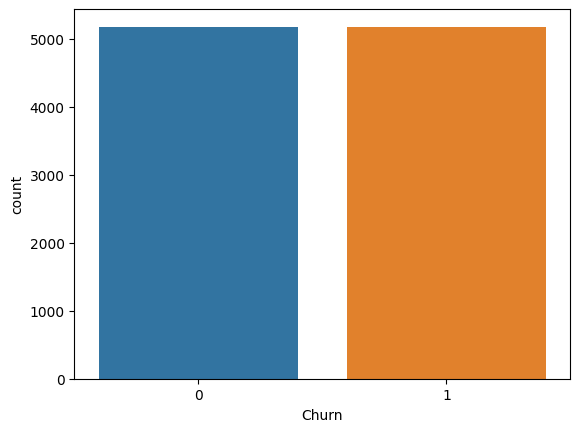

In [153]:
# Checking the new variable for data balancing
ax = sns.countplot(x='Churn', data=df3)

In [154]:
df.Churn.value_counts()

Nao    5174
Sim    1869
Name: Churn, dtype: int64

In [155]:
# Normalizing data before Modeling

norm = StandardScaler()

X_normalized = norm.fit_transform(X)

# Modeling

## Train / Test Split

In [156]:
# Splitting the dataset into X train, X test, y train and y test
X_train,X_test,y_train,y_test = train_test_split(X_normalized,y, test_size=.3, random_state=123)

## KNN method ( Proximity )

In [157]:
# KNN instance
knn = KNeighborsClassifier(metric='euclidean')

In [158]:
# Fitting the data
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [159]:
# Predicting new data
KNN_predicted = knn.predict(X_test)

In [160]:
# Checking the predicted values
KNN_predicted

array([1, 0, 0, ..., 0, 1, 1])

## Naive Bayes Method ( Probabilistic )

In [162]:
np.median(X_train)

-0.4461759755508453

In [163]:
bnb = BernoulliNB(binarize=-0.52)

In [164]:
bnb.fit(X_train,y_train)

BernoulliNB(binarize=-0.52)

In [165]:
NB_predict = bnb.predict(X_test)

In [166]:
NB_predict

array([1, 0, 0, ..., 1, 1, 1])

## Decision Tree ( Gini Impurity )

In [168]:
dtc = DecisionTreeClassifier(criterion='gini', random_state=42)

In [169]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [170]:
dtc.feature_importances_

array([2.05798634e-02, 1.45392208e-02, 6.81396299e-03, 2.15847580e-02,
       1.67986982e-02, 1.54927211e-01, 1.93369949e-01, 1.25298872e-02,
       3.28487545e-03, 4.47078860e-03, 2.33974902e-03, 3.91269517e-02,
       9.25559604e-05, 5.82255180e-03, 0.00000000e+00, 2.68694359e-02,
       5.69372068e-03, 0.00000000e+00, 9.97485095e-03, 6.28685162e-03,
       2.96179073e-04, 9.29233567e-03, 7.30098081e-03, 4.52807720e-03,
       1.87977372e-02, 4.88564906e-03, 0.00000000e+00, 3.32573340e-03,
       7.78990585e-03, 0.00000000e+00, 4.18558582e-03, 2.72086139e-02,
       2.14943675e-01, 8.25963171e-02, 1.81769104e-02, 1.65011371e-02,
       1.52723312e-02, 1.97929496e-02])

In [171]:
DTC_predict = dtc.predict(X_test)

In [172]:
DTC_predict

array([0, 0, 0, ..., 0, 1, 1])

## Model Validation

### Confusion Matrix

In [174]:
print(f'The confusion matrix for the KNN model, is:\n {confusion_matrix(y_test, KNN_predicted)}\n')
print(f'The confusion matrix for the NB  model, is:\n {confusion_matrix(y_test,    NB_predict)}\n')
print(f'The confusion matrix for the DTC model, is:\n {confusion_matrix(y_test,   DTC_predict)}')

The confusion matrix for the KNN model, is:
 [[1240  329]
 [ 247 1289]]

The confusion matrix for the NB model, is:
 [[1168  401]
 [ 393 1143]]

The confusion matrix for the DTC model, is:
 [[1243  326]
 [ 276 1260]]


### Accuracy

Accuracy == TP+TN / TP+FP+TN+FN

In [176]:
print(f'The accuracy for the KNN model, is: {accuracy_score(y_test, KNN_predicted).round(4)}\n')
print(f'The accuracy for the NB  model, is: {accuracy_score(y_test,   NB_predict ).round(4)}\n')
print(f'The accuracy for the DTC model, is: {accuracy_score(y_test,   DTC_predict).round(4)}')

The accuracy for the KNN model, is: 0.8145

The accuracy for the NB model, is: 0.7443

The accuracy for the DTC model, is: 0.8061


### Precision

Precision == TP / TP+FP

In [178]:
print(f'The precision for the KNN model, is: {precision_score(y_test, KNN_predicted).round(4)}\n')
print(f'The precision for the NB  model, is: {precision_score(y_test,   NB_predict ).round(4)}\n')
print(f'The precision for the DTC model, is: {precision_score(y_test,   DTC_predict).round(4)}')

The precision for the KNN model, is: 0.7967

The precision for the NB model, is: 0.7403

The precision for the DTC model, is: 0.7945


### Recall

Recall == TP / TP+FN

In [180]:
print(f'The recall for the KNN model, is: {recall_score(y_test, KNN_predicted).round(4)}\n')
print(f'The recall for the NB  model, is: {recall_score(y_test,   NB_predict ).round(4)}\n')
print(f'The recall for the DTC model, is: {recall_score(y_test,   DTC_predict).round(4)}')

The recall for the KNN model, is: 0.8392

The recall for the NB model, is: 0.7441

The recall for the DTC model, is: 0.8203


### F1 Score

F1 Score == 2 * precision*recall / precision + recall

In [182]:
print(f'The f1_score for the KNN model, is: {f1_score(y_test, KNN_predicted).round(4)}\n')
print(f'The f1_score for the NB  model, is: {f1_score(y_test,   NB_predict ).round(4)}\n')
print(f'The f1_score for the DTC model, is: {f1_score(y_test,   DTC_predict).round(4)}')

The f1_score for the KNN model, is: 0.8174

The f1_score for the NB model, is: 0.7422

The f1_score for the DTC model, is: 0.8072


__________________________________